In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('data.csv')
data.head()

,AGREEMENT_RK,TARGET,AGE,GENDER,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,FL_PRESENCE_FL,OWN_AUTO
0,60099204,1,42,1,1,0,1,0,25000.0,1,0,1,0
1,62244665,0,28,1,1,0,1,1,10000.0,1,0,0,0
2,61050759,0,64,0,1,1,2,0,30000.0,1,1,0,1
3,62079659,0,54,1,1,0,0,0,25000.0,1,0,1,1
4,66583553,0,26,0,1,0,1,1,15000.0,2,2,1,0


# Визуализация

In [27]:
data.describe().T
# по статистикам видно что есть выбросы в LOAN_NUM_TOTAL, LOAN_NUM_CLOSED, DEPENDANTS, OWN_AUTO
# избавляться от них не будем - возможно они значимые(?)
# большинство признаков бинарные, так что кажется что статистики не особо "говорящие"

,count,mean,std,min,25%,50%,75%,max
AGREEMENT_RK,15223.0,6.540183e+07,4.568181e+06,59910150.0,61920915.0,64370996.0,67088017.5,75292242.0
TARGET,15223.0,1.190304e-01,3.238349e-01,0.0,0.0,0.0,0.0,1.0
AGE,15223.0,4.040610e+01,1.160107e+01,21.0,30.0,39.0,50.0,67.0
GENDER,15223.0,6.545359e-01,4.755350e-01,0.0,0.0,1.0,1.0,1.0
SOCSTATUS_WORK_FL,15223.0,9.096105e-01,2.867485e-01,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,15223.0,1.344676e-01,3.411652e-01,0.0,0.0,0.0,0.0,1.0
CHILD_TOTAL,15223.0,1.099389e+00,9.954114e-01,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,15223.0,6.452079e-01,8.122521e-01,0.0,0.0,0.0,1.0,7.0
PERSONAL_INCOME,15223.0,1.385384e+04,9.015468e+03,24.0,8000.0,12000.0,17000.0,250000.0
LOAN_NUM_TOTAL,15223.0,1.414636e+00,8.395375e-01,1.0,1.0,1.0,2.0,16.0


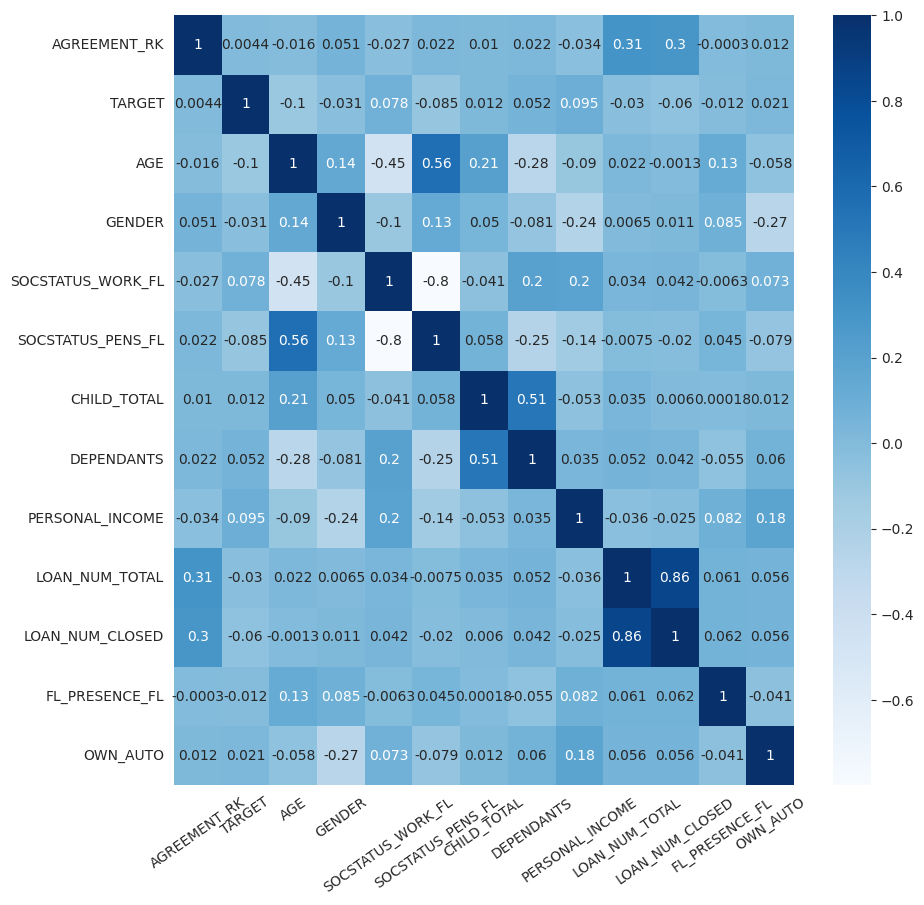

In [28]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=35)
plt.savefig('corr.png')
# корреляция с TARGET очень слабая, самый коррелирующий признак - PERSONAL_INCOME

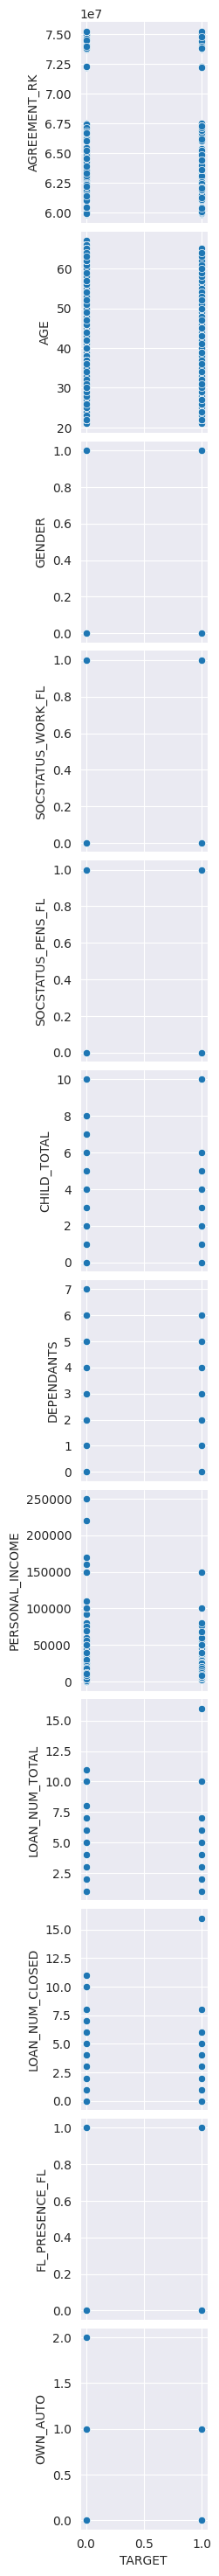

In [29]:
sns.pairplot(
    data=data,
    x_vars=['TARGET'],
    y_vars=[i for i in data.columns if i != 'TARGET'],
)

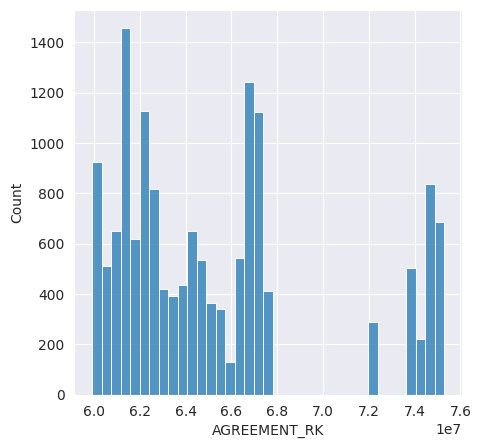

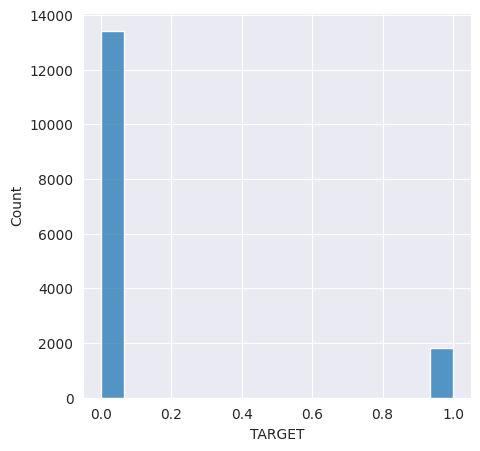

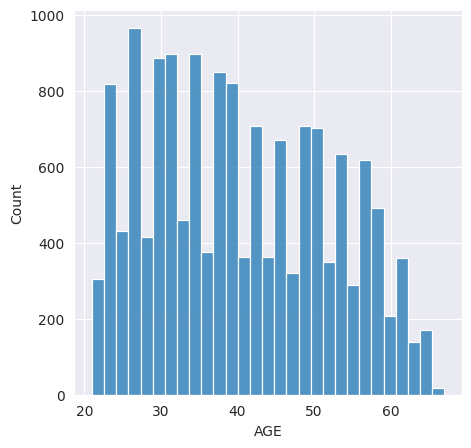

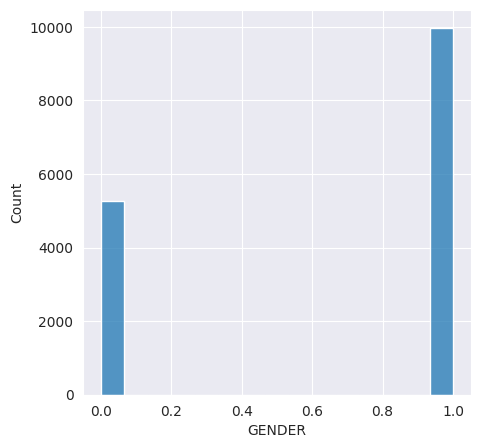

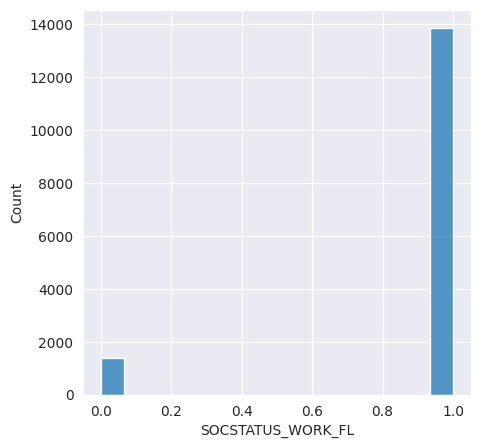

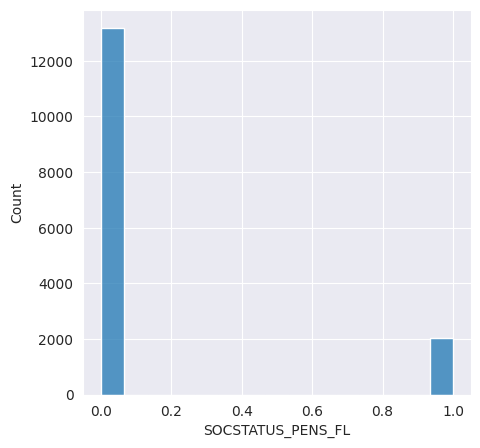

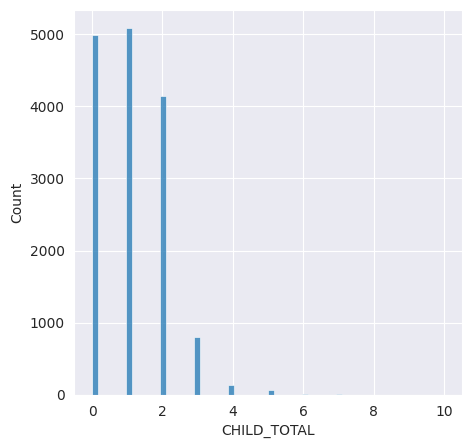

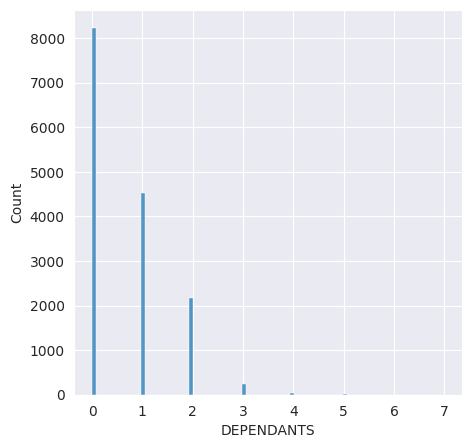

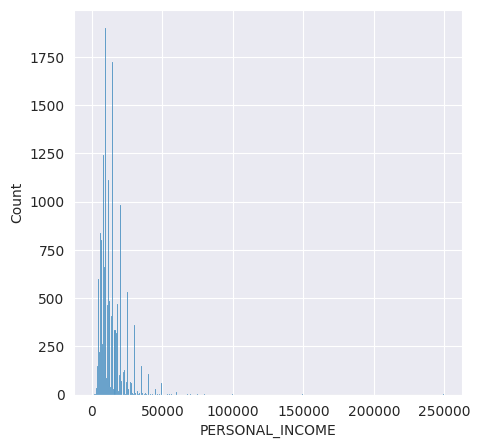

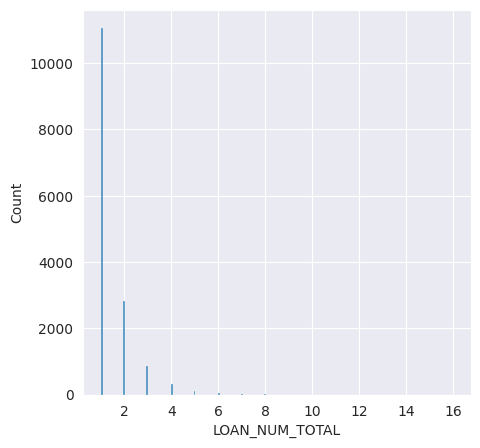

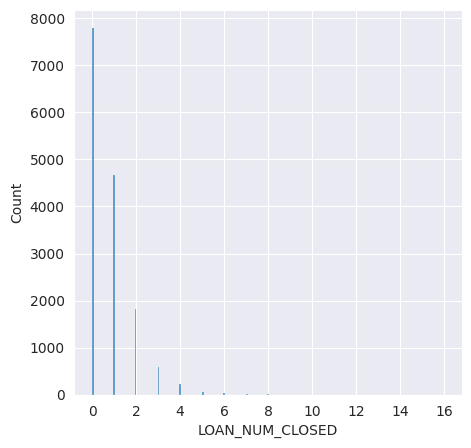

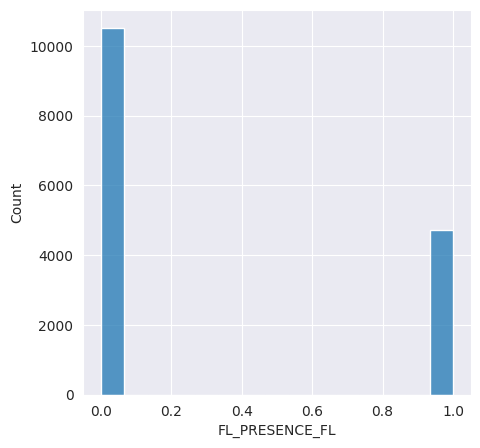

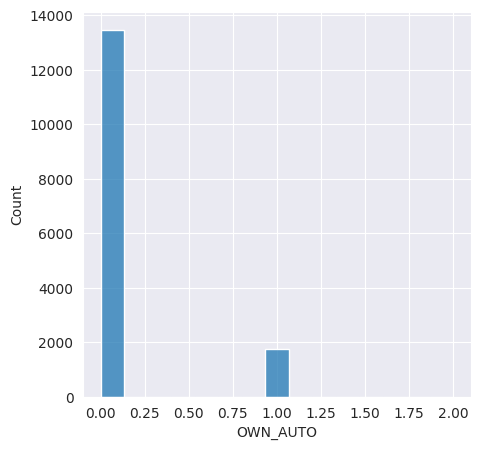

In [30]:
for i, column in enumerate(data.columns, 1):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    sns.histplot(data[column], ax=ax)

In [31]:
data.groupby(['TARGET']).TARGET.count()

TARGET
0    13411
1     1812
Name: TARGET, dtype: int64

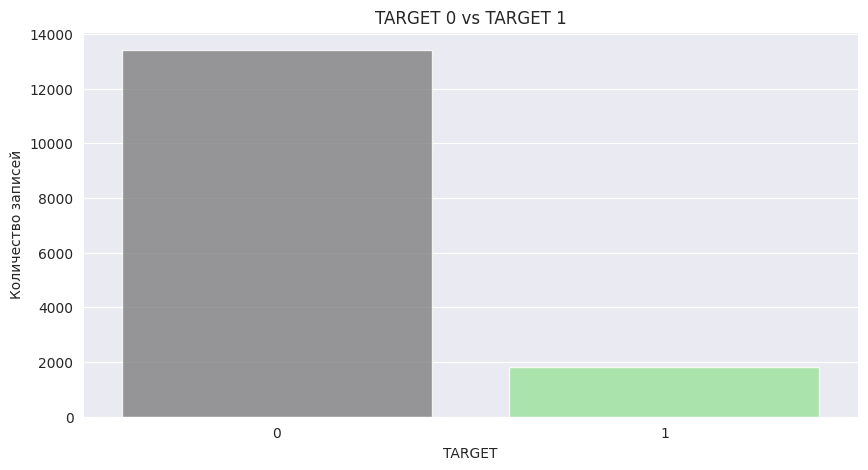

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(x='TARGET', data=data, alpha =.80, palette= ['grey','lightgreen'])
plt.title('TARGET 0 vs TARGET 1')
plt.ylabel('Количество записей')
plt.show()

# Обучение и оценка модели

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['TARGET', 'AGREEMENT_RK'], axis=1)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8839101872732621

In [36]:
model.predict_proba(X_train)

array([[0.79054382, 0.20945618],
       [0.88997198, 0.11002802],
       [0.96965447, 0.03034553],
       ...,
       [0.86414009, 0.13585991],
       [0.80817485, 0.19182515],
       [0.949116  , 0.050884  ]])

In [37]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8744028662420382

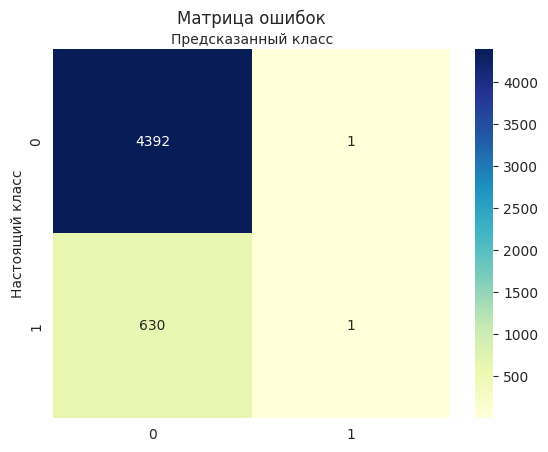

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu' ,fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Матрица ошибок')
plt.ylabel('Настоящий класс')
plt.xlabel('Предсказанный класс')
plt.savefig('confusion_matrix.png', bbox_inches = 'tight')

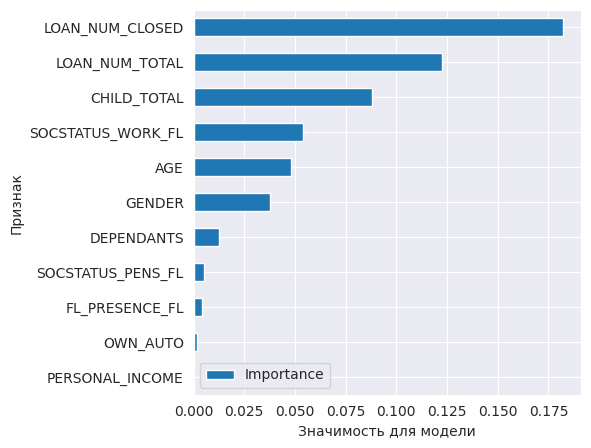

In [39]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5,5))
plt.xlabel('Значимость для модели')
plt.ylabel('Признак')
plt.savefig('feature_imp.png', bbox_inches = 'tight')

In [40]:
coefficients

array([-4.79347435e-02, -3.78702579e-02, -5.39897855e-02, -5.14894596e-03,
        8.80611439e-02, -1.25885452e-02,  1.25522334e-05, -1.22320790e-01,
       -1.81943605e-01,  4.27370122e-03, -1.77919345e-03])

In [41]:
import pickle

pickle.dump(model, open('model.pickle', 'wb'))